In [1]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt

In [13]:
rootdir = '/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/'

datadir_bgc = 'ocean_cobalt_omip_tracers_year_z/av/annual_5yr/'
filename_bgc = 'ocean_cobalt_omip_tracers_year_z.0846-0850.ann.nc'

datadir_rates = 'ocean_cobalt_omip_rates_year_z/av/annual_5yr/'
filename_rates = 'ocean_cobalt_omip_rates_year_z.0846-0850.ann.nc'


datadir_phys = 'ocean_annual_z/av/annual_5yr/'
filename_phys = 'ocean_annual_z.0846-0850.ann.nc'


In [14]:
# Biogeochemical dataset 

bgc_variables = xr.open_dataset(rootdir+datadir_bgc+filename_bgc)

# Rates dataset

rates_variables = xr.open_dataset(rootdir+datadir_rates+filename_rates)

#Physical dataset

phys_variables = xr.open_dataset(rootdir+datadir_phys+filename_phys)

KeyboardInterrupt: 

In [15]:
ds = xr.merge([phys_variables.thetao, bgc_variables.phyc, bgc_variables.volcello]) 

In [5]:
dr = xr.merge([rates_variables.pp, rates_variables.remoc, phys_variables.thetao, bgc_variables.volcello]) 

In [17]:
phyto = ds.phyc* ds.volcello
phyto.name = 'phyto'

#pp = dr.pp * dr.volcello
#pp.name = 'pp'

#remoc = dr.remoc * dr.volcello
#remoc.name = 'remoc'


ds = xr.merge([ds, phyto])
#dr = xr.merge([ds, pp, remoc])
#ds = xr.merge([ds, remoc])
ds = ds.isel(time=0)
#dr = dr.isel(time=0)



In [18]:
ds = ds.set_coords('thetao')
#dr = dr.set_coords('thetao')
theta_bins = np.arange(-2,30,2) 
#theta_bin_labels = np.arange(-1,29,2)

In [24]:
#pcolor_range = [0,0.005]
pcolor_range_phyto = [0,0.5e15] # Need larger range when zonal sum is calculated
#pcolor_range_pp_remin = [0,0.5e5]
pcolor_cmap = 'binary'
contour_levs = np.arange(0,30,5)
contour_cmap = 'bwr'
ylims = [500,0]

Text(0, 0.5, 'Depth (meters)')

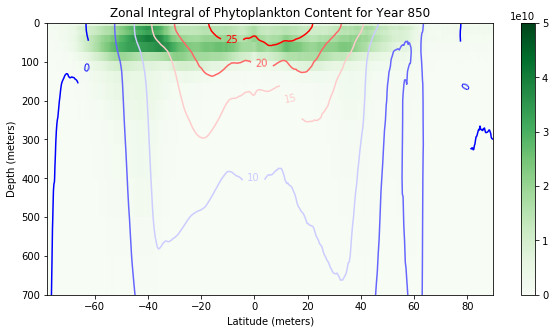

In [43]:
#Zonal integral of phytoplankton

pcolor_var = phyto.sum(dim='xh', skipna=True).squeeze()

# Volume-weighted zonal mean of temperature
vC2 = ds.thetao*ds.volcello
contour_var = vC2.sum(dim='xh', skipna=True)/ds.volcello.sum(dim='xh', skipna=True)

fig, ax = plt.subplots(figsize=(10,5))
im1 = ax.pcolormesh(ds.yh, ds.z_l, pcolor_var, cmap = pcolor_cmap)
im1.set_clim(pcolor_range_phyto[0],pcolor_range_phyto[1])
fig.colorbar(im1)
im2 = ax.contour(ds.yh,ds.z_l,contour_var,levels = contour_levs, cmap=contour_cmap)
ax.clabel(im2,inline=1,fontsize=10, fmt = '%i')
ax.invert_yaxis()
ax.set_ylim(ylims[0],ylims[1])

plt.title('Zonal Integral of Phytoplankton Content for Year 850')
plt.xlabel('Latitude (meters)')
plt.ylabel('Depth (meters)')

Text(0, 0.5, 'Depth (meters)')

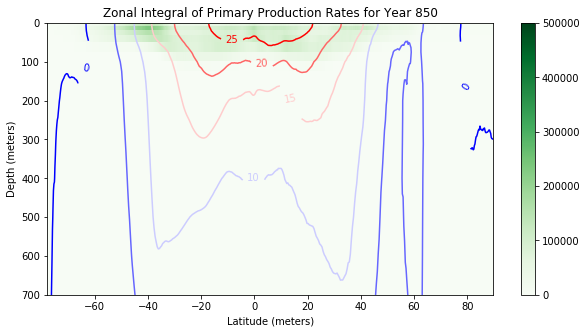

In [35]:
## Primary Production 

pcolor_var = pp.sum(dim='xh', skipna=True).squeeze()

# Volume-weighted zonal mean of temperature
vC2 = dr.thetao*dr.volcello
contour_var = vC2.sum(dim='xh', skipna=True)/ds.volcello.sum(dim='xh', skipna=True)

fig, ax = plt.subplots(figsize=(10,5))
im1 = ax.pcolormesh(ds.yh, ds.z_l, pcolor_var, cmap = pcolor_cmap)
im1.set_clim(pcolor_range_pp_remin[0],pcolor_range_pp_remin[1])
fig.colorbar(im1)
im2 = ax.contour(ds.yh,ds.z_l,contour_var,levels = contour_levs, cmap=contour_cmap)
ax.clabel(im2,inline=1,fontsize=10, fmt = '%i')
ax.invert_yaxis()
ax.set_ylim(ylims[0],ylims[1])

plt.title('Zonal Integral of Primary Production Rates for Year 850')
plt.xlabel('Latitude (meters)')
plt.ylabel('Depth (meters)')

Text(0, 0.5, 'Depth (meters)')

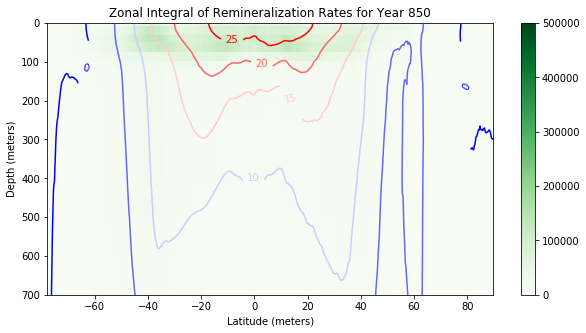

In [23]:
## Remineralization 

pcolor_var = remoc.sum(dim='xh', skipna=True).squeeze()

# Volume-weighted zonal mean of temperature
vC2 = dr.thetao*dr.volcello
contour_var = vC2.sum(dim='xh', skipna=True)/ds.volcello.sum(dim='xh', skipna=True)

fig, ax = plt.subplots(figsize=(10,5))
im1 = ax.pcolormesh(ds.yh, ds.z_l, pcolor_var, cmap = pcolor_cmap)
im1.set_clim(pcolor_range_pp_remin[0],pcolor_range_pp_remin[1])
fig.colorbar(im1)
im2 = ax.contour(ds.yh,ds.z_l,contour_var,levels = contour_levs, cmap=contour_cmap)
ax.clabel(im2,inline=1,fontsize=10, fmt = '%i')
ax.invert_yaxis()
ax.set_ylim(ylims[0],ylims[1])

plt.title('Zonal Integral of Remineralization Rates for Year 850')
plt.xlabel('Latitude (meters)')
plt.ylabel('Depth (meters)')


Text(0, 0.5, 'Depth (meters)')

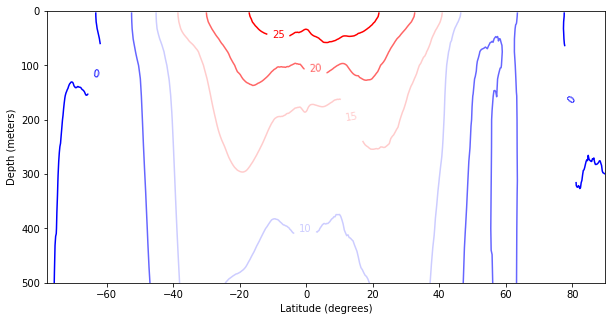

In [26]:
#Zonal integral of phytoplankton

pcolor_var = phyto.sum(dim='xh', skipna=True).squeeze()

# Volume-weighted zonal mean of temperature
vC2 = ds.thetao*ds.volcello
contour_var = vC2.sum(dim='xh', skipna=True)/ds.volcello.sum(dim='xh', skipna=True)

fig, ax = plt.subplots(figsize=(10,5))
im1 = ax.pcolormesh(ds.yh, ds.z_l, pcolor_var, cmap = pcolor_cmap)
im1.set_clim(pcolor_range_phyto[0],pcolor_range_phyto[1])
#fig.colorbar(im1)
im2 = ax.contour(ds.yh,ds.z_l,contour_var,levels = contour_levs, cmap=contour_cmap)
ax.clabel(im2,inline=1,fontsize=10, fmt = '%i')
ax.invert_yaxis()
ax.set_ylim(ylims[0],ylims[1])

#plt.title('Zonal Integral of Phytoplankton Content for Year 850')
plt.xlabel('Latitude (degrees)')
plt.ylabel('Depth (meters)')